In [3]:
%matplotlib inline

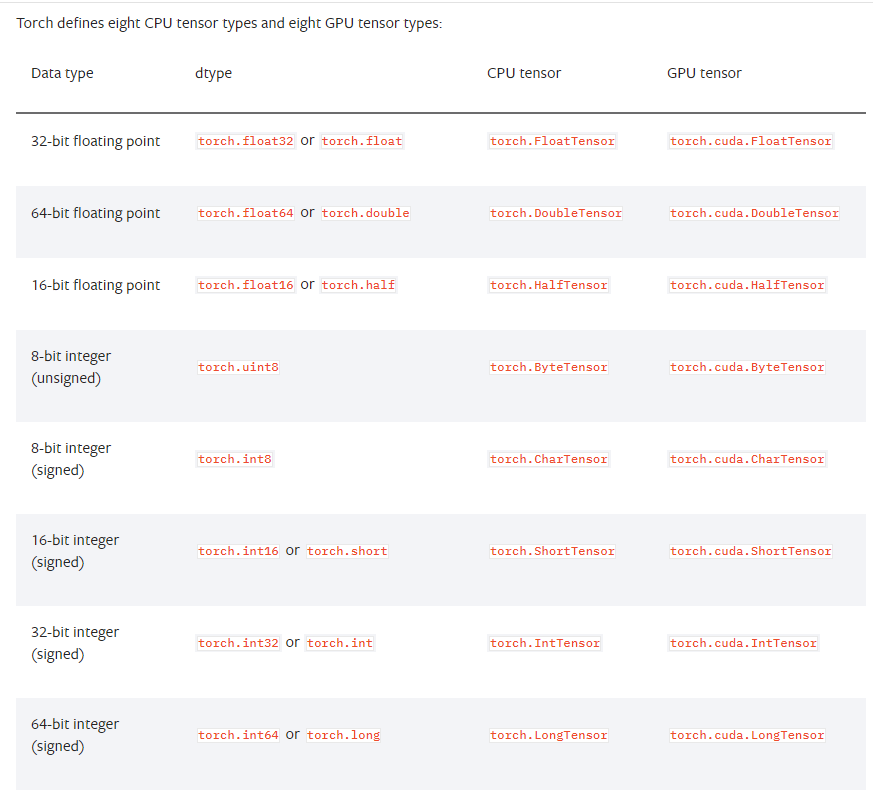


What is PyTorch?
================

It’s a Python-based scientific computing package targeted at two sets of
audiences:

-  A replacement for NumPy to use the power of GPUs
-  a deep learning research platform that provides maximum flexibility
   and speed

Getting Started
---------------

Tensors
^^^^^^^

Tensors are similar to NumPy’s ndarrays, with the addition being that
Tensors can also be used on a GPU to accelerate computing.



In [24]:
from __future__ import print_function
import torch

Construct a 5x3 matrix, uninitialized:



In [25]:
# 空tensor 
x = torch.empty(5, 3)
print(x)

tensor([[0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 2.1692e-42, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00]])


Construct a randomly initialized matrix:



In [26]:
#随机初始化
x = torch.rand(5, 3)
print(x)

tensor([[0.0804, 0.9135, 0.0124],
        [0.7293, 0.8461, 0.6482],
        [0.7587, 0.9155, 0.8765],
        [0.3212, 0.3517, 0.1593],
        [0.0094, 0.9165, 0.2011]])


Construct a matrix filled zeros and of dtype long:



In [27]:
#0初始化  int类型
x = torch.zeros(5, 3, dtype=torch.long)
print(x)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])


Construct a tensor directly from data:



In [28]:
x = torch.tensor([5.5, 3])
print(x)

tensor([5.5000, 3.0000])


or create a tensor based on an existing tensor. These methods
will reuse properties of the input tensor, e.g. dtype, unless
new values are provided by user



In [29]:
#返回一个值为1的tensor
#Returns a Tensor of size size filled with 1. By default, the returned Tensor has the same torch.dtype and torch.device as this tensor.
x = x.new_ones(5, 3, dtype=torch.double)      # new_* methods take in sizes
print(x)


x = torch.randn_like(x, dtype=torch.float)    # override dtype!
print(x)                                      # result has the same size

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)
tensor([[ 0.2744,  0.0520,  2.0482],
        [ 0.2423, -0.7110, -0.1469],
        [-0.1202, -0.5023, -0.2933],
        [ 1.1966,  0.6433,  0.2585],
        [ 1.1423, -1.1782, -0.6572]])


Get its size:



In [30]:
#tensor形状 也可以用x.shape
print(x.size()) #常用
print(x.shape)

torch.Size([5, 3])
torch.Size([5, 3])


<div class="alert alert-info"><h4>Note</h4><p>``torch.Size`` is in fact a tuple, so it supports all tuple operations.</p></div>

Operations
^^^^^^^^^^
There are multiple syntaxes for operations. In the following
example, we will take a look at the addition operation.

Addition: syntax 1



In [11]:
y = torch.rand(5, 3)
print(x + y)

tensor([[ 0.9476, -1.1233,  0.7155],
        [ 1.4515,  0.0370,  0.2523],
        [ 2.3193,  1.1577, -0.1648],
        [ 0.1884,  0.8336, -0.0909],
        [ 1.6198, -0.4191, -0.9116]])


Addition: syntax 2



In [12]:
print(torch.add(x, y))

tensor([[ 0.9476, -1.1233,  0.7155],
        [ 1.4515,  0.0370,  0.2523],
        [ 2.3193,  1.1577, -0.1648],
        [ 0.1884,  0.8336, -0.0909],
        [ 1.6198, -0.4191, -0.9116]])


Addition: providing an output tensor as argument



In [13]:
result = torch.empty(5, 3)
torch.add(x, y, out=result)
print(result)

tensor([[ 0.9476, -1.1233,  0.7155],
        [ 1.4515,  0.0370,  0.2523],
        [ 2.3193,  1.1577, -0.1648],
        [ 0.1884,  0.8336, -0.0909],
        [ 1.6198, -0.4191, -0.9116]])


Addition: in-place



In [14]:
# adds x to y
y.add_(x)
print(y)

tensor([[ 0.9476, -1.1233,  0.7155],
        [ 1.4515,  0.0370,  0.2523],
        [ 2.3193,  1.1577, -0.1648],
        [ 0.1884,  0.8336, -0.0909],
        [ 1.6198, -0.4191, -0.9116]])


<div class="alert alert-info"><h4>Note</h4><p>Any operation that mutates a tensor in-place is post-fixed with an ``_``.
    For example: ``x.copy_(y)``, ``x.t_()``, will change ``x``.</p></div>

You can use standard NumPy-like indexing with all bells and whistles!



In [15]:
print(x[:, 1])

tensor([-1.3586, -0.5146,  1.0212,  0.5446, -1.1932])


Resizing: If you want to resize/reshape tensor, you can use ``torch.view``:



In [16]:
x = torch.randn(4, 4)
y = x.view(16)
z = x.view(-1, 8)  # the size -1 is inferred from other dimensions
print(x.size(), y.size(), z.size())

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


If you have a one element tensor, use ``.item()`` to get the value as a
Python number



In [17]:
x = torch.randn(1)
print(x)
print(x.item())

tensor([-1.6074])
-1.6074138879776


**Read later:**


  100+ Tensor operations, including transposing, indexing, slicing,
  mathematical operations, linear algebra, random numbers, etc.,
  are described
  `here <https://pytorch.org/docs/torch>`_.

NumPy Bridge
------------

Converting a Torch Tensor to a NumPy array and vice versa is a breeze.

The Torch Tensor and NumPy array will share their underlying memory
locations, and changing one will change the other.

Converting a Torch Tensor to a NumPy Array
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^



In [38]:
a = torch.ones(5)
print(a)


x = torch.tensor([5, 3])
print(x)
x = x.new_ones(5, dtype=torch.float)      # new_* methods take in sizes
print(x)

tensor([1., 1., 1., 1., 1.])
tensor([5, 3])
tensor([1., 1., 1., 1., 1.])


In [39]:
# tensor -> numpy
b = a.numpy()
print(b)
#See how the numpy array changed in value.
# b = a.numpy()  a变化，b也变化
a.add_(1)
print(a)
print(b)

[1. 1. 1. 1. 1.]
tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]


Converting NumPy Array to Torch Tensor
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
See how changing the np array changed the Torch Tensor automatically



In [41]:
# numpy ->tensor 
import numpy as np
a = np.ones(5)
print(a) #[1. 1. 1. 1. 1.]
b = torch.from_numpy(a)
np.add(a, 1, out=a) 
print(a) #[2. 2. 2. 2. 2.]
print(b) #tensor([2., 2., 2., 2., 2.], dtype=torch.float64)

[1. 1. 1. 1. 1.]
[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


All the Tensors on the CPU except a CharTensor support converting to
NumPy and back.

CUDA Tensors
------------

Tensors can be moved onto any device using the ``.to`` method.



In [22]:
# let us run this cell only if CUDA is available
# We will use ``torch.device`` objects to move tensors in and out of GPU
if torch.cuda.is_available():
    device = torch.device("cuda")          # a CUDA device object
    y = torch.ones_like(x, device=device)  # directly create a tensor on GPU
    x = x.to(device)                       # or just use strings ``.to("cuda")``
    z = x + y
    print(z)
    print(z.to("cpu", torch.double))       # ``.to`` can also change dtype together!


In [42]:
print(torch.cuda.is_available())

False
